In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
wur = pd.read_csv('2023QSWorld_University_Rankings.csv')
wur

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501+,5.8,501+,3.6,601+,...,601+,1.7,601+,NaN,NaN,8.1,601+,NaN,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501+,5.8,501+,2.4,601+,...,601+,9.3,601+,1.3,601+,8.8,601+,30.9,403,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501+,2.6,501+,3.2,601+,...,601+,5.2,601+,2.8,601+,51.1,601+,NaN,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,501+,1.8,501+,2.7,601+,...,601+,NaN,NaN,NaN,NaN,7.5,601+,8.7,601+,-


In [3]:
# Inspect the data
wur.head()  # Display the first few rows

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [4]:
# Get an overview of the data structure
wur.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [5]:
# Summary statistics of numerical columns
wur.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1422.000000,1422.000000,1421.000000,1420.000000,1417.000000,1324.000000,1365.000000,1409.000000,1410.000000
mean,711.500000,20.124684,20.657143,29.997113,24.529358,31.659517,26.545348,49.570121,26.186809
std,410.640354,22.802706,24.027928,28.172207,27.910952,34.170817,30.896854,30.205439,26.201036
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,356.250000,5.400000,4.400000,8.200000,3.100000,4.800000,3.300000,21.600000,6.700000
50%,711.500000,10.800000,10.300000,18.250000,11.100000,13.750000,10.800000,47.700000,15.500000
75%,1066.750000,23.775000,27.000000,43.500000,39.400000,55.075000,40.500000,77.600000,36.900000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
# Check for missing values
wur.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
ar rank           0
er score          1
er rank           0
fsr score         2
fsr rank          0
cpf score         5
cpf rank          0
ifr score        98
ifr rank         98
isr score        57
isr rank         57
irn score        13
irn rank         13
ger score        12
ger rank         12
score scaled      0
dtype: int64

In [7]:
# Handle missing values (if necessary)
wur.fillna(0, inplace=True)  # Filling missing values with 0

In [8]:
wur

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501+,5.8,501+,3.6,601+,...,601+,1.7,601+,0.0,0,8.1,601+,0.0,0,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501+,5.8,501+,2.4,601+,...,601+,9.3,601+,1.3,601+,8.8,601+,30.9,403,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501+,2.6,501+,3.2,601+,...,601+,5.2,601+,2.8,601+,51.1,601+,0.0,0,-
1420,1421,University of Craiova,RO,Romania,3.3,501+,1.8,501+,2.7,601+,...,601+,0.0,0,0.0,0,7.5,601+,8.7,601+,-


In [9]:
# 2. Exploratory Data Analysis (EDA)
# Get top 10 universities by ranking
top_10_universities = wur.sort_values('Rank', ascending=True).head(10)
top_10_universities


,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
5,6,California Institute of Technology (Caltech),US,United States,96.5,28,87.1,58,100.0,3,...,4,99.8,75,85.1,134,73.0,425,98.8,24,97
6,7,Imperial College London,UK,United Kingdom,98.3,24,99.7,10,99.5,34,...,84,100.0,55,100.0,13,98.1,20,88.8,76,97
7,8,UCL,UK,United Kingdom,99.4,14,98.6,16,97.6,51,...,119,99.2,87,100.0,14,100.0,2,90.3,71,95
8,9,ETH Zurich - Swiss Federal Institute of Techno...,CH,Switzerland,98.6,18,91.3,51,74.2,164,...,18,100.0,24,98.0,59,96.2,56,91.1,64,93.6
9,10,University of Chicago,US,United States,99.2,16,92.2,46,92.9,71,...,79,81.6,214,76.0,176,89.6,170,98.2,30,93.2


In [11]:
# Get top 10 universities by ranking
top_10_universities = wur.sort_values('Rank', ascending=True).head(10)
print(top_10_universities[['Rank', 'institution', 'location']])

   Rank                                        institution        location
0     1       Massachusetts Institute of Technology (MIT)    United States
1     2                            University of Cambridge  United Kingdom
2     3                                Stanford University   United States
3     4                               University of Oxford  United Kingdom
4     5                                 Harvard University   United States
5     6       California Institute of Technology (Caltech)   United States
6     7                            Imperial College London  United Kingdom
7     8                                                UCL  United Kingdom
8     9  ETH Zurich - Swiss Federal Institute of Techno...     Switzerland
9    10                              University of Chicago   United States


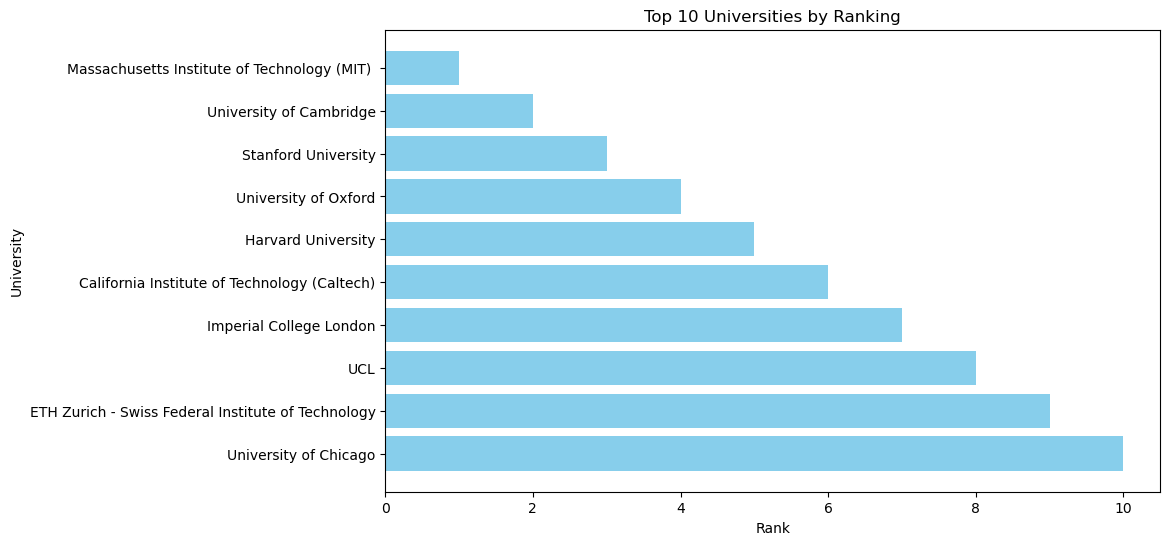

In [12]:
# Plot a bar chart for the top 10 universities
plt.figure(figsize=(10, 6))
plt.barh(top_10_universities['institution'], top_10_universities['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('University')
plt.title('Top 10 Universities by Ranking')
plt.gca().invert_yaxis()  # Invert y-axis so that top ranked university is on top

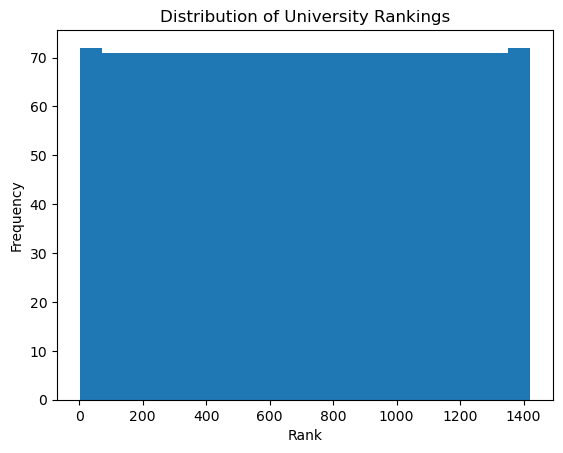

In [13]:
# Distribution of Rankings
# Plot the distribution of rankings
wur['Rank'].plot(kind='hist', bins=20, title='Distribution of University Rankings')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

In [14]:
top_100 = wur[wur['Rank'] <= 100]
top_100

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,The University of Sheffield,UK,United Kingdom,58.7,122,53.5,155,59.4,264,...,284,85.3,199,97.8,61,94.7,79,33.7,376,59.5
96,97,University of St Andrews,UK,United Kingdom,46.2,175,67.6,106,61.1,249,...,209,98.8,100,99.7,35,83.4,265,44.1,292,59.5
97,98,"Trinity College Dublin, The University of Dublin",IE,Ireland,67.9,95,48.2,187,25.7,573,...,199,99.8,73,93.3,92,87.3,206,97.9,32,59.1
98,99,Sungkyunkwan University(SKKU),KR,South Korea,60.2,115,72.7,90,83.9,115,...,368,18.9,592,38.7,354,58.8,582,33.9,375,58.9


In [15]:
top_500 = wur[wur['Rank'] <= 500]
top_500

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,University of Granada,ES,Spain,42.1,196,7.8,501+,6.4,601+,...,531,3.7,601+,17.4,571,95.6,62,4.1,601+,24.4
496,497,Brandeis University,US,United States,9.6,501+,3.8,501+,55.7,279,...,524,19.4,588,68.5,208,20.3,601+,55.1,214,24.3
497,498,Jilin University,CN,China (Mainland),13.5,501+,44.5,214,42.0,371,...,480,13.7,601+,2.4,601+,55.5,601+,20.2,584,24.3
498,499,Central South University,CN,China (Mainland),7.3,501+,2.0,501+,5.5,601+,...,38,8.2,601+,3.9,601+,51.0,601+,11.9,601+,24.2


In [16]:
top_1000 = wur[wur['Rank'] <= 1000]
top_1000

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,University of Zagreb,HR,Croatia,15.8,501+,5.5,501+,28.1,540,...,601+,2.0,601+,1.6,601+,92.6,113,50.7,246,-
996,997,University of Žilina,SK,Slovakia,4.5,501+,1.0,501+,52.7,297,...,601+,2.8,601+,3.0,601+,20.8,601+,29.4,432,-
997,998,Verona University,IT,Italy,8.4,501+,5.0,501+,6.1,601+,...,370,5.2,601+,4.6,601+,54.2,601+,5.3,601+,-
998,999,Viet Nam National University Ho Chi Minh City ...,VN,Vietnam,20.5,408,18.5,491,9.3,601+,...,601+,5.3,601+,1.3,601+,43.9,601+,33.6,378,-


1. What is the correlation between Academic Reputation, Employer Reputation, Faculty-Student Ratio, and the overall ranking?
2. Which metric has the strongest correlation with university ranking?

In [18]:
# Calculate correlation between ranking and key metrics
metrics = ['ar score', 'er score', 'fsr score']
correlation = wur[['Rank'] + metrics].corr()

print("Correlation between Rank and Key Metrics:")
print(correlation)

Correlation between Rank and Key Metrics:
               Rank  ar score  er score  fsr score
Rank       1.000000 -0.736358 -0.661131  -0.580643
ar score  -0.736358  1.000000  0.842995   0.375069
er score  -0.661131  0.842995  1.000000   0.342769
fsr score -0.580643  0.375069  0.342769   1.000000


# Top Universities by Country
Which countries have the most universities in the top 100, 500, and 1000?
How do the rankings of universities compare across different countries?

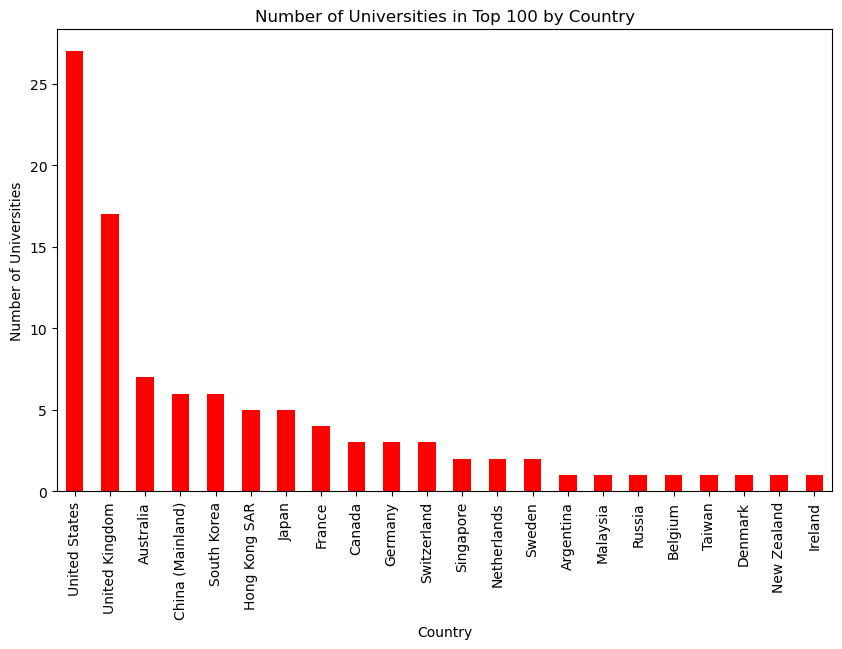

In [19]:
# Top 100 universities by country
top_100_countries = wur[wur['Rank'] <=100]['location'].value_counts()
plt.figure(figsize = (10,6))
top_100_countries.plot(kind = 'bar', color='red')
plt.title('Number of Universities in Top 100 by Country')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.show()

# Key Metrics Comparison
1. # What are the average scores of Academic Reputation (ar score), Employer Reputation (er score), and Faculty-Student Ratio (fsr score) across the top 100 universities?  
2. # Calculate average scores for key metrics in the top 100 and between 101-500

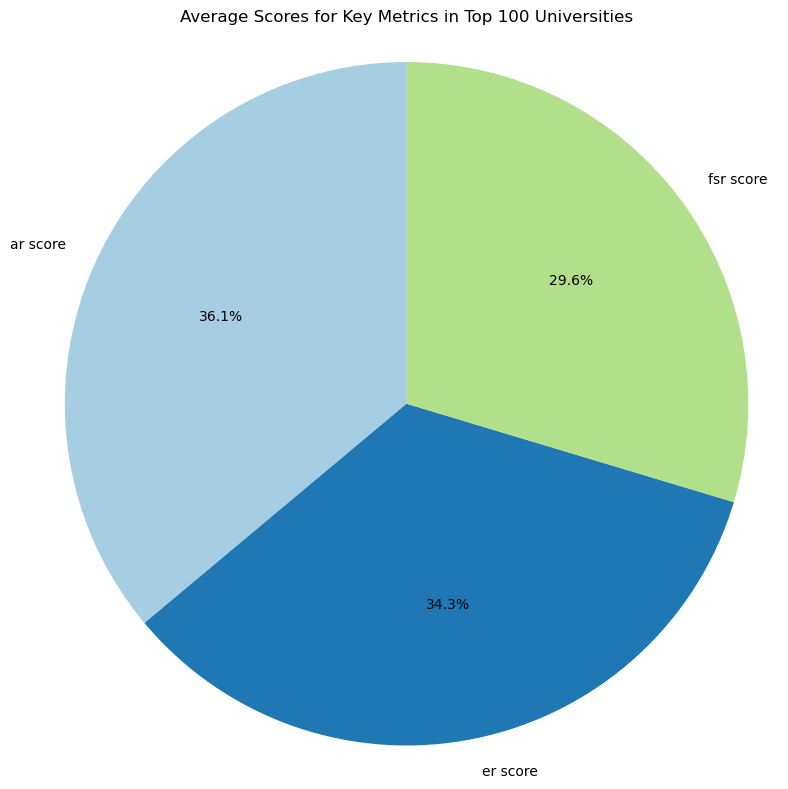

In [25]:
# Calculate average scores for key metrics in the top 100
top_100_metrics = wur[wur['Rank'] <= 100][['ar score', 'er score', 'fsr score']].mean()
plt.figure(figsize=(8, 8))
plt.pie(top_100_metrics, labels=top_100_metrics.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Scores for Key Metrics in Top 100 Universities')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.tight_layout()
plt.show()

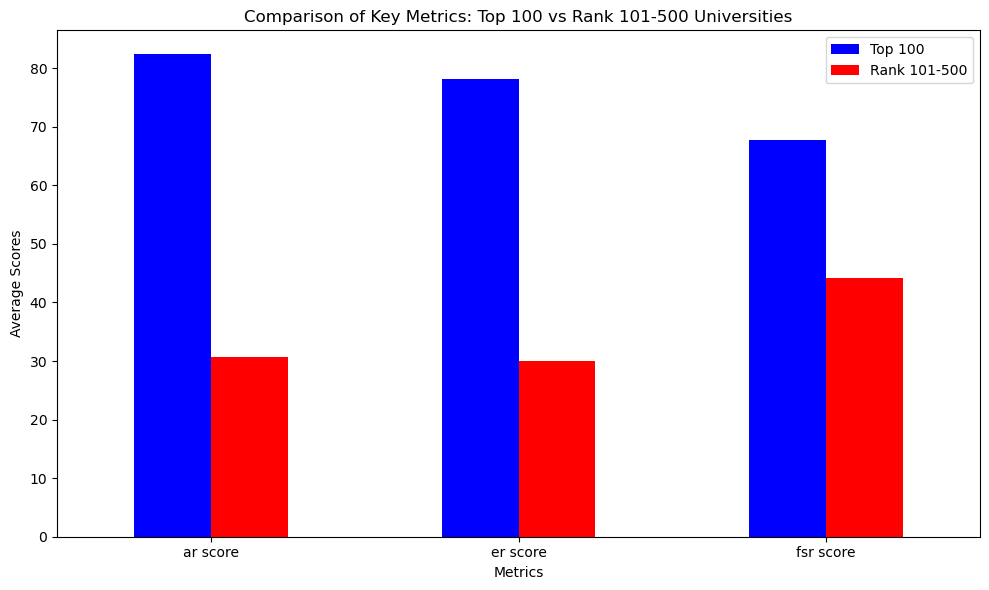

In [32]:
# Calculate average scores for key metrics in the top 100 and between 101-500
top_100_metrics = wur[wur['Rank'] <= 100][['ar score', 'er score', 'fsr score']].mean()
below_500_metrics = wur[(wur['Rank'] > 100) & (wur['Rank'] <= 500)][['ar score', 'er score', 'fsr score']].mean()

# Combine the data into a DataFrame for comparison
metrics_comparison = pd.DataFrame({
    'Top 100': top_100_metrics,
    'Rank 101-500': below_500_metrics
})

# Plot the result as a grouped bar chart
metrics_comparison.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Comparison of Key Metrics: Top 100 vs Rank 101-500 Universities')
plt.xlabel('Metrics')
plt.ylabel('Average Scores')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()